## Observations and Insights 

![title](img/Laboratory.jpg)

# Three observations that can be made from the data.

# Read the mouse data and the study results

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


# Read the study results

In [4]:
# Read the study results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


# Combine the data into a single dataset
# Display the data table for preview

In [5]:
# Combine the data into a single dataset
combinedata_df = pd.merge(mouse_metadata, study_results,how = 'outer', on ='Mouse ID')

# Display the data table for preview
combinedata_df.head(2000) 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Checking the number of mice.

In [6]:
# Checking the number of mice.
num_mice = combinedata_df['Mouse ID'].unique()
len(num_mice)

249

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID_duplic = combinedata_df.loc[combinedata_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

print(ID_duplic)



['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = combinedata_df.loc[combinedata_df['Mouse ID']== "g989"]
g989_data.head(1000)                                       
                                              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


13 repited values

# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_df = combinedata_df.drop(g989_data.index)
clean_combine_df

                    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


1893-13 (g989 repited) = 1880

# Checking the number of mice in the clean DataFrame.

In [10]:
# Checking the number of mice in the clean DataFrame.
num_miceUnique = clean_combine_df['Mouse ID'].unique()
len(num_miceUnique)

248

In [11]:
#create a new CSV file with combine data 
clean_combine_df.to_csv("CLEANcombine_data.csv", index=False, header=True)

## Summary Statistics

 Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [12]:
#create variable for the summary
Byregimen_df =  clean_combine_df.groupby('Drug Regimen')
Byregimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [13]:

pd.set_option('display.max_columns',100)
Byregimen_df.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)                                                     \
                  count       mean       std   min   25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  19.965217  2.732404  15.0  17.0  20.5  22.0  25.0   
Ceftamin          178.0  27.398876  1.581460  25.0  26.0  28.0  28.0  30.0   
Infubinol         178.0  27.196629  2.183810  23.0  25.0  27.0  29.0  30.0   
Ketapril          188.0  27.861702  1.841884  25.0  26.0  28.0  30.0  30.0   
Naftisol          186.0  27.166667  1.499249  25.0  26.0  27.0  28.0  30.0   
Placebo           181.0  27.928177  1.837973  25.0  27.0  28.0  30.0  30.0   
Propriva          148.0  27.135135  1.712891  25.0  26.0  26.0  29.0  30.0   
Ramicane          228.0  19.679825  3.235014  16.0  17.0  19.0  22.0  25.0   
Stelasyn          181.0  27.856354  1.643616  25.0  27.0  28.0  29.0  30.0   
Zoniferol         182.0  27.692308  1.419612  25.0  27.0  28.0  29.0  30.0   

             Timepoint                                                      \
                 count       mean        std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0   
Propriva         148.0  17.060811  13.676648  0.0   5.0  15.0  26.25  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0   

             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0 

Groupby method

In [14]:
#create statistical variables: mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_byreg = Byregimen_df['Tumor Volume (mm3)'].mean()
median_byreg = Byregimen_df['Tumor Volume (mm3)'].median()
variance_byreg = Byregimen_df['Tumor Volume (mm3)'].var()
std_byreg = Byregimen_df['Tumor Volume (mm3)'].std()
sem_byreg = Byregimen_df['Tumor Volume (mm3)'].sem()

In [15]:
#make data frame to Assemble the resulting series into a single summary dataframe
sum_stat_groupby_df =pd.DataFrame({
    'Mean':mean_byreg,
    'Median':median_byreg,
    'Variance':variance_byreg,
    'Std':std_byreg,
    'SEM':sem_byreg
})
print(sum_stat_groupby_df)

                   Mean     Median   Variance       Std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


Summary Aggregation method

In [16]:
#use  statistical method: mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Sum_staMtd_groupby_df = Byregimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


In [17]:
#make data frame to Assemble the resulting series into a single summary dataframe
sum_stat_groupby_SMethod_df =Sum_staMtd_groupby_df.rename(columns={
    'mean':'Mean',
    'median':'Median',
    'var':'Variance',
    'std':'Std',
    'sem':'SEM'
})
print(sum_stat_groupby_SMethod_df)

                   Mean     Median   Variance       Std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


# Bar and Pie Charts

Generate a bar plot showing the total number of measurements taken on each drug


In [18]:
#cread by count variable
count_byregiment = clean_combine_df.groupby(['Drug Regimen']).count()['Mouse ID']
count_byregiment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [19]:
count_byregiment.sum()

1880

Using Pandas

Text(0.5, 1.0, 'Number of Mesurements per Treatment')

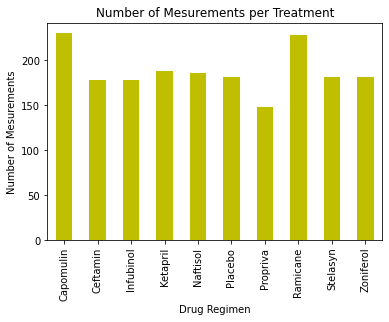

In [20]:
# Create a Pandas bar plot based off of the group series from before and label the title
barplot_pandas = count_byregiment.plot.bar(color='y')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mesurements")
plt.title("Number of Mesurements per Treatment")



Using Pyplot

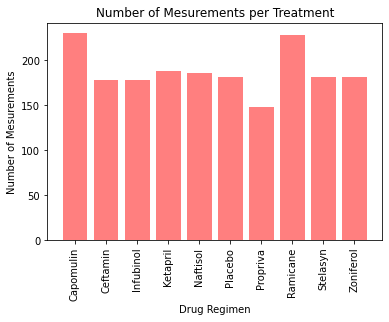

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = count_byregiment.index.values
y_axis = count_byregiment.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mesurements per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mesurements")
plt.xticks(rotation="vertical")

plt.show()

Generate a pie plot showing the distribution of female versus male mice

In [22]:
#cread by Sex variable
count_bySex = clean_combine_df.groupby(['Sex']).count()['Mouse ID']

#cread by count variable
# count_byregiment = clean_combine_df.groupby(['Drug Regimen']).count()['Mouse ID']
# count_byregiment
count_bySex 

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

Using Pandas

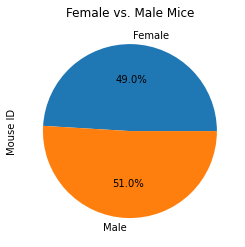

In [23]:
plt.title("Female vs. Male Mice")
count_bySex.plot.pie(autopct= "%1.1f%%")
plt.show()

Using Pyplot

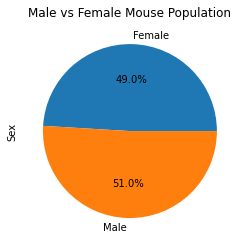

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [1, 0]
plot = count_bySex.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

Final tumor volumen for each mouse

In [25]:
#create a df with all the regimens by combining
list_Allregiments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Allregiments = clean_combine_df[clean_combine_df['Drug Regimen'].isin(list_Allregiments)]
Allregiments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [26]:
Allregiments_greates = Allregiments.groupby(['Drug Regimen','Mouse ID']).agg(\
Final_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
print(Allregiments_greates.head)


<bound method NDFrame.head of                        Final_tumor_size
Drug Regimen Mouse ID                  
Capomulin    b128                38.983
             b742                38.940
             f966                30.486
             g288                37.074
             g316                40.159
...                                 ...
Ramicane     s508                30.276
             u196                40.668
             w678                43.166
             y449                44.183
             z578                30.639

[100 rows x 1 columns]>


In [27]:
#create variable for each treatment regimens
Capomulin_df = clean_combine_df.loc[clean_combine_df['Drug Regimen']== 'Capomulin']
Ramicane_df = clean_combine_df.loc[clean_combine_df['Drug Regimen']== 'Ramicane']
Infubinol_df = clean_combine_df.loc[clean_combine_df['Drug Regimen']== 'Infubinol']
Ceftamin_df = clean_combine_df.loc[clean_combine_df['Drug Regimen']== 'Ceftamin']

Capomulin

In [28]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_great = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volMAX = pd.DataFrame(Capomulin_great)
Capomulin_comb = pd.merge(Capomulin_volMAX, clean_combine_df, on=('Mouse ID',"Timepoint"), how='left')
Capomulin_comb.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [29]:
#Create Tumor Volume(mm3) 
Capomulin_TumVol =Capomulin_comb.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
Capomulin_TumVol=Capomulin_TumVol['Tumor Volume (mm3)']


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Capomulin_TumVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

In [31]:
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_great = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volMAX = pd.DataFrame(Ramicane_great)
Ramicane_comb = pd.merge(Ramicane_volMAX, clean_combine_df, on=('Mouse ID',"Timepoint"), how='left')
Ramicane_comb.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [32]:
#Create Tumor Volume(mm3) 
Ramicane_TumVol =Ramicane_comb.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
Ramicane_TumVol=Ramicane_TumVol['Tumor Volume (mm3)']

In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Ramicane_TumVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The median of temperatures is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

In [34]:
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_great = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volMAX = pd.DataFrame(Infubinol_great)
Infubinol_comb = pd.merge(Infubinol_volMAX, clean_combine_df, on=('Mouse ID',"Timepoint"), how='left')
Infubinol_comb.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [35]:
#Create Tumor Volume(mm3) 
Infubinol_TumVol =Infubinol_comb.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
Infubinol_TumVol=Infubinol_TumVol['Tumor Volume (mm3)']

In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Infubinol_TumVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The median of temperatures is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

In [37]:
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_great = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volMAX = pd.DataFrame(Ceftamin_great)
Ceftamin_comb = pd.merge(Ceftamin_volMAX, clean_combine_df, on=('Mouse ID',"Timepoint"), how='left')
Ceftamin_comb.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [38]:
#Create Tumor Volume(mm3) 
Ceftamin_TumVol =Ceftamin_comb.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
Ceftamin_TumVol=Ceftamin_TumVol['Tumor Volume (mm3)']

In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Ceftamin_TumVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


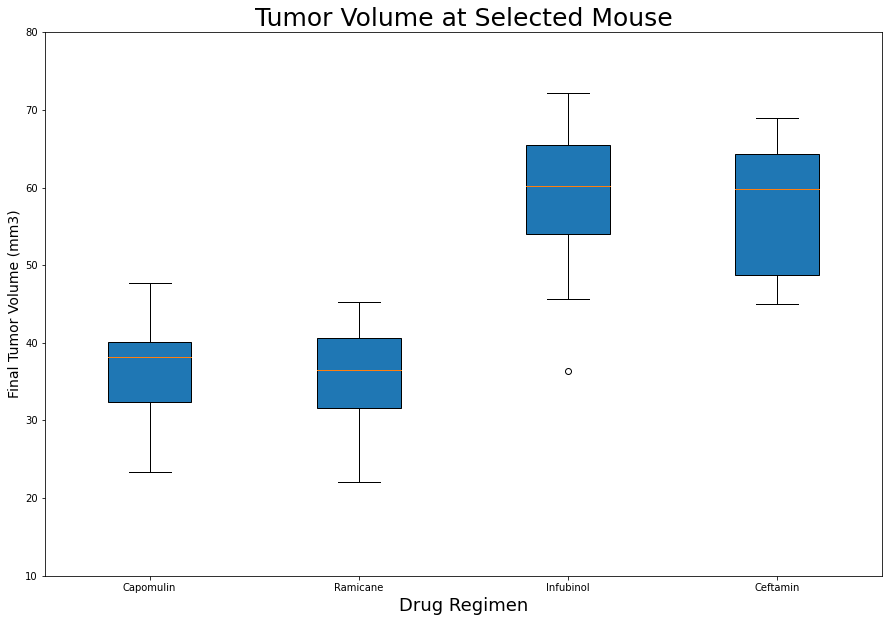

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_TumVol = [Capomulin_TumVol, Ramicane_TumVol, Infubinol_TumVol, Ceftamin_TumVol]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 18)
ax1.boxplot(box_plot_TumVol, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("box_plot_finalTumorvol.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

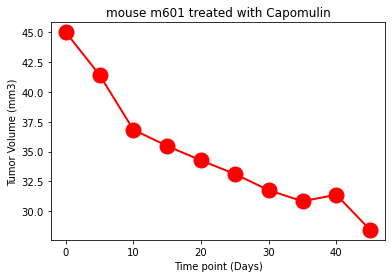

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
from matplotlib.animation import FuncAnimation
Amouse_tumVol = Capomulin_df.loc[Capomulin_df['Mouse ID']== 'm601',:]
Amouse_tumVol.head()
x_axis = Amouse_tumVol["Timepoint"]
tumsiz = Amouse_tumVol["Tumor Volume (mm3)"]



fig1, ax1 = plt.subplots()
plt.title('mouse m601 treated with Capomulin')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel('Time point (Days)')
plt.ylabel('Tumor Volume (mm3)')




Text(0, 0.5, 'Averag Tumor Volume (mm3)')

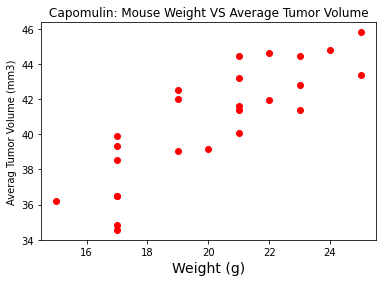

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
#Make Plot with labels
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="red")
plt.title('Capomulin: Mouse Weight VS Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlationCoe = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
correlationCoe

(0.8419363424694717, 1.322572243471279e-07)

r-squared is: 0.709


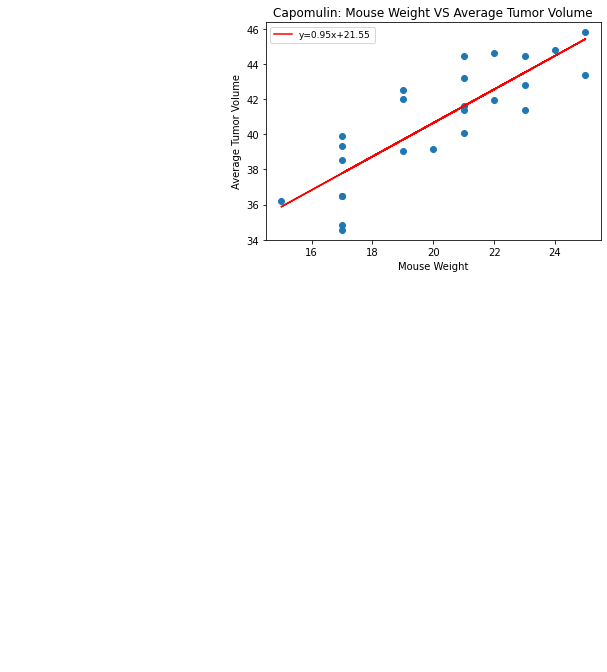

In [48]:
#Calculate linear regression 
from scipy.stats import linregress
x_values = avg_capm_vol["Weight (g)"]
y_values = avg_capm_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make Plot with labels
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept) )
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.title('Capomulin: Mouse Weight VS Average Tumor Volume')
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.legend(fontsize=9)
print(f"r-squared is: {round(rvalue**2,3)}")




plt.show()